In [2]:
%matplotlib inline

In [2]:
# we may need to reinstall our software if running in a fresh runtime
import sys
!{sys.executable} -m pip install --quiet gwosc==0.5.8 gwpy==2.0.4 "ipykernel>=5.2.0"
# then RESTART THE KERNEL

# Signal processing with GW data

We have seen in the [previous workbook](./2-GWpy.ipynb) that GW detector data are noisy:

Fetched 1 URLs from www.gw-openscience.org for [1126259457 .. 1126259467))
Reading data... [Done]


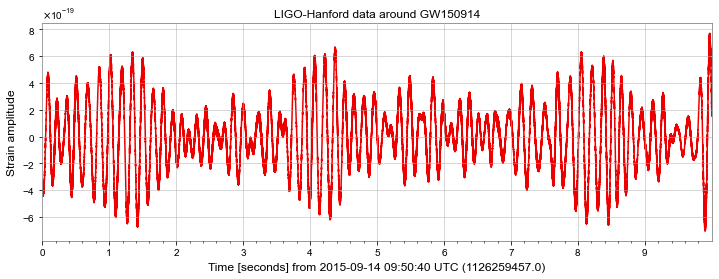

In [17]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
gps = event_gps("GW150914")
start, stop = int(gps)-5, int(gps) + 5
data = TimeSeries.fetch_open_data("H1", start, stop, verbose=True, cache=True)
plot = data.plot(
    title="LIGO-Hanford data around GW150914",
    ylabel="Strain amplitude",
    color="gwpy:ligo-hanford",
)

There doesn't seem to be anything interesting in there, but there is!
The problem is that very low-frequency noises dominate the amplitude in the data, these typically come from so-called '_anthropogenic_' sources such as local vehicle traffic around the observatory, bad weather, and even from the ocean waves hitting the nearest coastline.

## Time-domain filtering of GW data

In order to extract a real gravitational-wave signal, we need to filter out the noise and amplify the signal.
One easy way to do that is to apply 'pass' filters that dampen contributions from certain frequencies ('highpass' dampens low-frequency noise, allowing high frequencies to 'pass' through, for example).
In our case we want to use a bandpass filter to extract the middle of the spectrum, eliminating contributions at both extremes.

We can do this in GWpy using the `TimeSeries.bandpass` function:

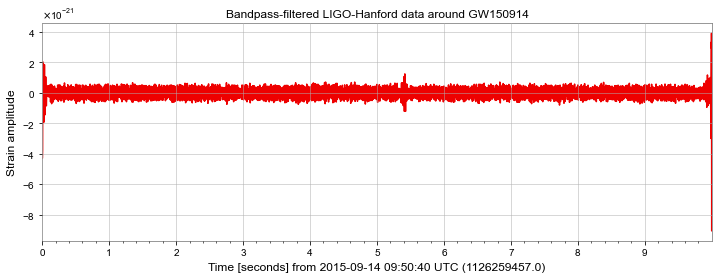

In [19]:
filtered = data.bandpass(50, 250)
plot = filtered.plot(
    title="Bandpass-filtered LIGO-Hanford data around GW150914",
    ylabel="Strain amplitude",
    color="gwpy:ligo-hanford",
)

Now, we can see the overall amplitude is much lower (~1e-21), but there are three clear features. The features at either end of the data are called 'edge effects' that corrupt the start and end of the data where the filters don't work very well.
We can just remove those by cropping our data:

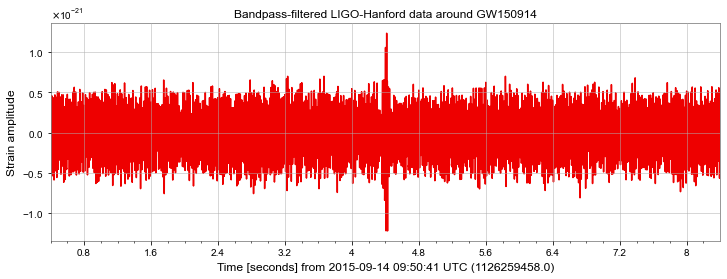

In [23]:
filtered = data.bandpass(50, 250).crop(gps-4, gps+4)
plot = filtered.plot(
    title="Bandpass-filtered LIGO-Hanford data around GW150914",
    ylabel="Strain amplitude",
    color="gwpy:ligo-hanford",
)

Now we can see the central feature much more clearly, this looks like something interesting!
We can remove even more noise by recalling the _ASD_ of the LIGO detector noise from last time:

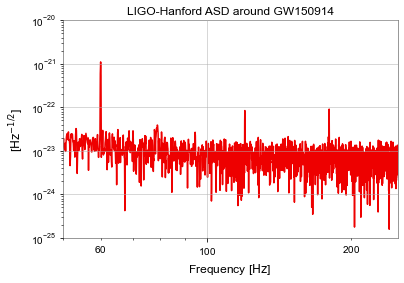

In [24]:
asd = data.asd()
plot = asd.plot(
    title="LIGO-Hanford ASD around GW150914",
    xlim=(50, 250),
    ylim=(1e-25, 1e-20),
    color="gwpy:ligo-hanford",
)

There are a few very narrow lines that have much higher amplitude than the surrounding frequencies.
We can filter those out as well by using a notch filter:

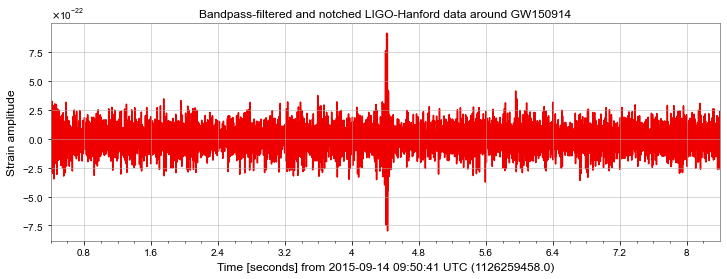

In [25]:
for frequency in (60, 120, 180):
    filtered = filtered.notch(frequency)
plot = filtered.plot(
    title="Bandpass-filtered and notched LIGO-Hanford data around GW150914",
    ylabel="Strain amplitude",
    color="gwpy:ligo-hanford",
)

Now we can just zoom in around the time of interest:

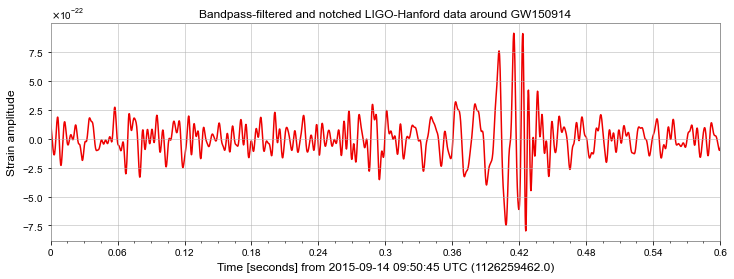

In [26]:
axes = plot.gca()
axes.set_xlim(gps-.4, gps+.2)
plot

Now we can see the unmistakable signature of a binary black hole merger.
This is the first binary black hole system ever observed!

You can see this example in more detail [here](https://gwpy.github.io/docs/stable/examples/signal/gw150914.html) as part of the GWpy online documentation Examples.

## Recap

In this tutorial we have seen

- GW detector data are noisy, with dominant contributions from high and low frequencies
- we can filter out these extremes using a 'bandpass' filter
- we can also remove noise from narrow lines using a 'notch' filter
- if you apply these to the LIGO-Hanford data around GW150914, you can extract a real gravitational-wave signal

## Further reading

This notebook, and the previous ones, represent a tiny, extremely dense introduction to gravitational waves and data analysis in Python.

### The GWODW series

These materials were based on a larger set of content developed over the last few years for the [Gravitational-Wave Open Data Workshop series](https://www.gw-openscience.org/workshops/).

If you are interested, I encourage you to dive into the full tutorial set for the most recent [Open Data Workshop (ODW)](https://www.gw-openscience.org/static/workshop4/).
This workshop included many hours of excellent talks, which explain more of the science behind the methods we have seen here.

The online tutorials are all similarly based on jupyter notebooks, which can be found on GitHub here:

<https://github.com/gw-odw/odw-2021/>

The tutorials can be run interactively online using google CoLab:

<https://colab.research.google.com/github/gw-odw/odw-2021/>

or on your own machine by cloning the git repository and spinning up jupyter locally:

```bash
git clone https://github.com/gw-odw/odw-2021.git
cd odw-2021
jupyter-notebook
```

### GWpy's online examples

The [GWpy online documentation](https://gwpy.github.io) comes with a large set of [worked examples](https://gwpy.github.io/docs/stable/examples/) that demonstrate using the powerful data access, signal processing, and visualisation methods available.

### Other python packages: PyCBC

While GWpy provides generic tools for exploring gravitational-wave data, the excellent [PyCBC](https://pycbc.org) project provides a Python library and associated workflows for detecting and studying gravitational-wave signals from compact binary coalescences (CBCs).

The online documentation for PyCBC goes also includes a rich set of worked examples that go through the techniques that are used by GW researchers to detect real signals, using the actual code we use to do it.
Central to that is a technique called the 'matched filter', which is used to estimate how well the detector data match up with a pre-computed model waveform. This is the cornerstone to all of our detections to date!

### Questions and feedback

I welcome any feedback you have on these tutorials, and am happy to receive any questions you have as well.
All of the Python projects we have used today are hosted on GitHub:

- https://github.com/gwpy/gwpy
- https://github.com/gwpy/gwosc
- https://github.com/gwastro/pycbc

On those pages you can open 'issues' to ask questions on any aspect of those projects, and receive answers directly from the experts.

I am happy to receive questions by email: macleoddm@cardiff.ac.uk.

Thank you.